Тайцзицюань:  1
Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                        


True

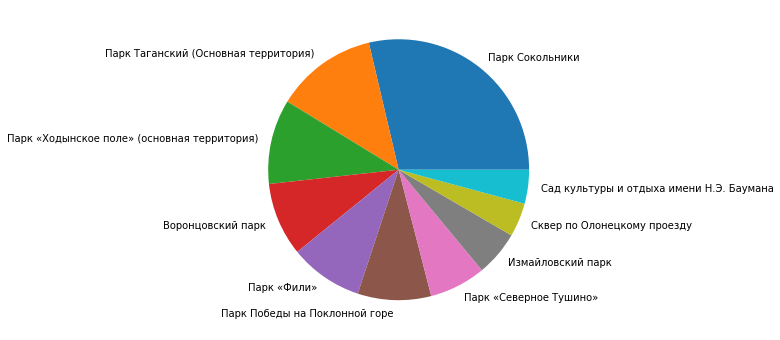

In [8]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import binascii
import pdfkit
from jinja2 import Template
from io import BytesIO

r = requests.get('https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json')
data = pd.DataFrame(json.loads(r.content), columns=["CourseName", "CoursesTimetable", "NameOfPark"])
data['NameOfPark'] = data['NameOfPark'].apply(lambda x: x['value'])
data.columns = ['Активность', 'Расписание', 'Парк']
print('Тайцзицюань: ', data[data['Активность'].str.contains('Тайцзицюань')]['Активность'].count())

fig = plt.figure(figsize=(12, 6))
area = fig.add_subplot(1, 1, 1)
parks = data.groupby('Парк').count().sort_values('Активность', ascending=False)
parks.head(10)['Активность'].plot.pie(ax=area, label='')

# plt.show()
img = BytesIO()
plt.savefig(img)
plt.savefig(img)
img = 'data:image/png;base64,' + binascii.b2a_base64(img.getvalue(), newline=False).decode("UTF-8")

html_template = '''<html>
<head>
    <title>Данные по активностям в парках Москвы</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Распределение числа активностей по паркам</h1>
    <img style="width:80%;margin-left:20%" src="{{data.image}}" alt="Распределение числа активностей по паркам">
    <h2>Данные по активностям</h2>
    {{data.table}}
</body>
</html>'''

pd.set_option('display.max_colwidth', 1000)
html = Template(html_template).render(data = {
    'image': img,
    'table': data.to_html(index=False)
})

config = pdfkit.configuration(wkhtmltopdf='/usr/local/bin/wkhtmltopdf')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'moscow_park_courses.pdf',
                  configuration=config, options = options)